<a href="https://colab.research.google.com/github/kra268/ChemCoder/blob/main/dask_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install PyTDC deepchem rdkit==2023.03.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 20.1 MB/s eta 0:00:00
  Created wheel for PyTDC: filename=PyTDC-0.4.0-py3-none-any.whl size=139519 sha256=f3672ac704ce818d62bdd176e6cc4c2d8081044cd0c306d285c20396abaf5c81
  Stored in directory: /root/.cache/pip/wheels/65/da/1a/38e66a2b950c7acc0f41d3bbbc12071653d099baa5402d9c32
Successfully built PyTDC
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling 

In [2]:
import rdkit
rdkit.__version__

'2023.03.1'

In [3]:
import numpy as np
import pandas as pd
import deepchem as dc  # Featurization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tdc.single_pred import ADME
from rdkit.Chem import PandasTools, AllChem, Descriptors, AddHs

In [4]:
data = ADME(name = 'Lipophilicity_AstraZeneca')
split = data.get_split('scaffold')

Downloading...
100%|██████████| 298k/298k [00:00<00:00, 3.69MiB/s]
Loading...
Done!
100%|██████████| 4200/4200 [00:04<00:00, 975.64it/s]


In [5]:
split['train']

,Drug_ID,Drug,Y
0,CHEMBL1951894,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,3.21
1,CHEMBL1951893,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,2.67
2,CHEMBL197536,O=c1cc(N2CCOCC2)oc2cc(O)ccc12,1.00
3,CHEMBL1807852,C[C@H]1O[C@@H](n2cnc3c(N)nc(OC4CC5CC5C4)nc32)[...,1.66
4,CHEMBL23,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,1.99
...,...,...,...
2935,CHEMBL181326,O=C(NCC(=O)N(CCO)c1ccccc1)c1cc2cc(Cl)ccc2[nH]1,3.37
2936,CHEMBL1688458,O=C(O)CCc1ccc(OCc2cccc(Oc3ccccc3)c2)cc1,2.47
2937,CHEMBL1682949,CC[C@H](NC(=O)c1c([S+](C)[O-])c(-c2cccs2)nc2cc...,3.56
2938,CHEMBL366947,CC(C)(C)OC(=O)c1ncn2c1[C@@H]1CCCN1C(=O)c1c(Br)...,2.48


In [6]:
train = split['train']
test = split['test']
valid = split['valid']

In [7]:
train.shape

(2940, 3)

In [8]:
test.shape

(840, 3)

In [9]:
valid.shape

(420, 3)

In [10]:
PandasTools.AddMoleculeColumnToFrame(train, 'Drug', 'Molecule')

In [11]:
train.sample(3)

,Drug_ID,Drug,Y,Molecule
395,CHEMBL1950856,CN[C@@H](C)C(=O)N[C@H](C(=O)N[C@H]1CCCN(CCc2cc...,2.92,<rdkit.Chem.rdchem.Mol object at 0x7f948c13c270>
537,CHEMBL1199945,COCC(=O)N1CCC(n2cc(-c3cnc(N)c(-c4nc5ccccc5o4)c...,3.40,<rdkit.Chem.rdchem.Mol object at 0x7f948c18c120>
28,CHEMBL139250,Nc1nc(N)nc(-c2ccc(Cl)cc2)n1,2.12,<rdkit.Chem.rdchem.Mol object at 0x7f948c172110>


In [12]:
PandasTools.AddMoleculeColumnToFrame(test, 'Drug', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(valid, 'Drug', 'Molecule')

In [13]:
test.sample(3)

,Drug_ID,Drug,Y,Molecule
162,CHEMBL2031238,Cc1ccc(NC(=O)c2ccoc2)cc1-n1cnc2ccc(N3CCN(C)CC3...,2.43,<rdkit.Chem.rdchem.Mol object at 0x7f948c15f0d0>
418,CHEMBL1916260,CCC(CC)NC(=O)c1cnn(-c2ccccc2)c1NS(=O)(=O)C1CCCC1,0.69,<rdkit.Chem.rdchem.Mol object at 0x7f948c1ba260>
499,CHEMBL2178945,Cc1nc(C)c(-c2ccc([C@H]3CC[C@@H](CC(=O)O)CC3)c(...,1.20,<rdkit.Chem.rdchem.Mol object at 0x7f948c190660>


In [14]:
valid.sample(3)

,Drug_ID,Drug,Y,Molecule
183,CHEMBL2062578,N#Cc1cnn2c(NC3CC3)cc(-n3ccc4ccc(CO)cc43)nc12,3.09,<rdkit.Chem.rdchem.Mol object at 0x7f948c132ce0>
133,CHEMBL108249,O=S(=O)(CCCNCCc1ccc(O)c2nc(O)sc12)NCCOCCc1ccc(...,1.57,<rdkit.Chem.rdchem.Mol object at 0x7f948c131700>
24,CHEMBL335744,CC(C)C(=O)Nc1nc(-c2ccccn2)cc2ccccc12,2.70,<rdkit.Chem.rdchem.Mol object at 0x7f948c1526c0>


In [15]:
train['Molecule'] = train.Molecule.apply(AddHs)

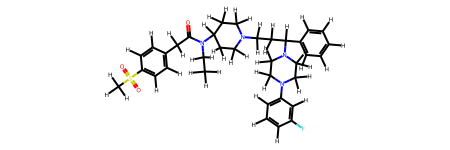

In [16]:
train.Molecule[0]

In [17]:
test['Molecule'] = test.Molecule.apply(AddHs)
valid['Molecule'] = valid.Molecule.apply(AddHs)

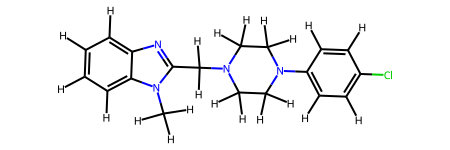

In [18]:
test.Molecule[0]

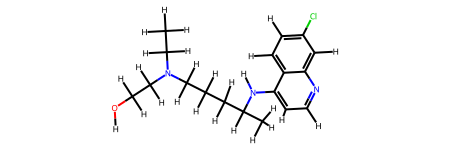

In [19]:
valid.Molecule[0]

In [20]:
des_keys = Descriptors.CalcMolDescriptors(valid.Molecule[0]).keys()

In [21]:
des_keys

dict_keys(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',

In [22]:
# Create a featurizer object
featurizer = dc.feat.RDKitDescriptors()

In [23]:
train['descript'] = train.Molecule.apply(featurizer.featurize)

In [24]:
train.head()

,Drug_ID,Drug,Y,Molecule,descript
0,CHEMBL1951894,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,3.21,<rdkit.Chem.rdchem.Mol object at 0x7f948c005850>,"[[15.424770250248978, 15.424770250248978, 0.92..."
1,CHEMBL1951893,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,2.67,<rdkit.Chem.rdchem.Mol object at 0x7f948c0057e0>,"[[15.023139174262797, 15.023139174262797, 0.80..."
2,CHEMBL197536,O=c1cc(N2CCOCC2)oc2cc(O)ccc12,1.00,<rdkit.Chem.rdchem.Mol object at 0x7f948c005770>,"[[12.749214143990928, 12.749214143990928, 0.24..."
3,CHEMBL1807852,C[C@H]1O[C@@H](n2cnc3c(N)nc(OC4CC5CC5C4)nc32)[...,1.66,<rdkit.Chem.rdchem.Mol object at 0x7f948c005d20>,"[[8.911682991206124, 8.911682991206124, 0.0155..."
4,CHEMBL23,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,1.99,<rdkit.Chem.rdchem.Mol object at 0x7f948c005cb0>,"[[14.87330024372773, 14.87330024372773, 0.5636..."


In [25]:
type(train.descript[0])

numpy.ndarray

In [26]:
# Write for test and valid
test['descript'] = test.Molecule.apply(featurizer.featurize)
valid['descript'] = valid.Molecule.apply(featurizer.featurize)

In [27]:
train['descript'] = train['descript'].apply(lambda x: list(x[0]))

In [28]:
# Write for test and valid
test['descript'] = test['descript'].apply(lambda x: list(x[0]))
valid['descript'] = valid['descript'].apply(lambda x: list(x[0]))

In [29]:
test.sample(1)

,Drug_ID,Drug,Y,Molecule,descript
385,CHEMBL1824369,N#Cc1ccccc1COc1cc(OCCCN2CCCC2)ccc1C(=O)Nc1cccc...,2.34,<rdkit.Chem.rdchem.Mol object at 0x7f948c13f760>,"[14.168316321667012, 14.168316321667012, 0.503..."


In [30]:
valid.sample(1)

,Drug_ID,Drug,Y,Molecule,descript
283,CHEMBL2087433,COc1cc(C)c(S(=O)(=O)N(C)CCOCC(=O)N2CCC(C3CCN(C...,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f948c1b9e00>,"[14.594487107461358, 14.594487107461358, 1.139..."


In [33]:
# Dask helps us to speed up operation by parallelizing the tasks at hand.
import dask
from dask.distributed import Client

In [34]:
client = Client()

# Write a function that separates out each descriptors into different columns
def get_des(data_set):
  for idx, mol in enumerate(data_set.Molecule):
    all_des = Descriptors.CalcMolDescriptors(mol)
    for des in des_keys:
      data_set.loc[idx,des] = all_des[des]


delayed_get_des = dask.delayed(get_des)
delayed_get_des(train)
delayed_get_des(test)
delayed_get_des(valid)

client.shutdown()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44185
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39875'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44419'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38439', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38439
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42984
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43269', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43269
INFO:distributed.core:Startin

In [35]:
train.head(3)

,Drug_ID,Drug,Y,Molecule,descript,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL1951894,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,3.21,<rdkit.Chem.rdchem.Mol object at 0x7f948c005850>,"[15.424770250248978, 15.424770250248978, 0.922...",15.424770,15.424770,0.922819,-6.025120,0.299585,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1951893,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,2.67,<rdkit.Chem.rdchem.Mol object at 0x7f948c0057e0>,"[15.023139174262797, 15.023139174262797, 0.802...",15.023139,15.023139,0.802819,-6.019449,0.311311,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL197536,O=c1cc(N2CCOCC2)oc2cc(O)ccc12,1.00,<rdkit.Chem.rdchem.Mol object at 0x7f948c005770>,"[12.749214143990928, 12.749214143990928, 0.244...",12.749214,12.749214,0.244478,-3.530140,0.823393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
